## **Learning the concept of Handling Missing Values by Removing Rows or Cols. containing missing by MCAR(missing completely at random)**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('/content/data_science_job.csv')

In [4]:
data.sample(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
5761,18054,city_105,0.794,Male,Has relevent experience,no_enrollment,Graduate,STEM,9.0,500-999,Pvt Ltd,11.0,0.0
9235,9529,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,Arts,4.0,NaN,NaN,98.0,1.0
17921,24402,city_114,0.926,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,10/49,Pvt Ltd,6.0,0.0
12944,31957,city_142,0.727,NaN,No relevent experience,no_enrollment,Graduate,STEM,15.0,100-500,Funded Startup,18.0,0.0
14591,17152,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,8.0,10000+,Pvt Ltd,26.0,0.0
15644,26625,city_21,0.624,Female,Has relevent experience,Full time course,Masters,STEM,0.0,10/49,Pvt Ltd,54.0,1.0
6115,14839,city_73,0.754,Male,No relevent experience,Part time course,Graduate,STEM,7.0,NaN,Public Sector,9.0,1.0
13709,2465,city_45,0.890,Male,Has relevent experience,no_enrollment,Masters,Business Degree,16.0,1000-4999,Pvt Ltd,50.0,0.0
14726,21611,city_16,0.910,Male,Has relevent experience,no_enrollment,Masters,STEM,16.0,NaN,NaN,138.0,0.0
2953,10020,city_16,0.910,Male,Has relevent experience,Full time course,Graduate,STEM,16.0,500-999,Pvt Ltd,53.0,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  18679 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  training_hours          18392 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.9+ MB


In [7]:
data.isnull().mean()*100   #It will give the percentage of missing values in each column
                           #Generally we perform MCAR when missing values in each row is lees than 5%(Not a specific rule just for reference)

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [8]:
data.shape

(19158, 13)

In [10]:
#It gives the number or name of cols. having missing values less than 5%
cols = [var for var in data.columns if data[var].isnull().mean() < 0.05 and data[var].isnull().mean() > 0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [11]:
data[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
17868,0.920,no_enrollment,Graduate,6.0,14.0
19098,0.624,no_enrollment,Masters,6.0,139.0
9866,0.897,Full time course,Graduate,4.0,25.0
13696,0.897,no_enrollment,Masters,13.0,80.0
15256,0.624,NaN,Masters,6.0,21.0


In [14]:
data['education_level'].value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

### **Following functions shows the percentage of remaining data after removing missing values rows/cols. of the dataset**

In [15]:
len(data[cols].dropna()) / len(data) #It means 89% approx. data will be left after removing the missing values

0.8968577095730244

### **Comparing the dimensions of before dataset and new data set**

In [16]:
new_data = data[cols].dropna()
data.shape, new_data.shape

((19158, 13), (17182, 5))

### **Plotting the new dataset by visulaizing it in Histogram**

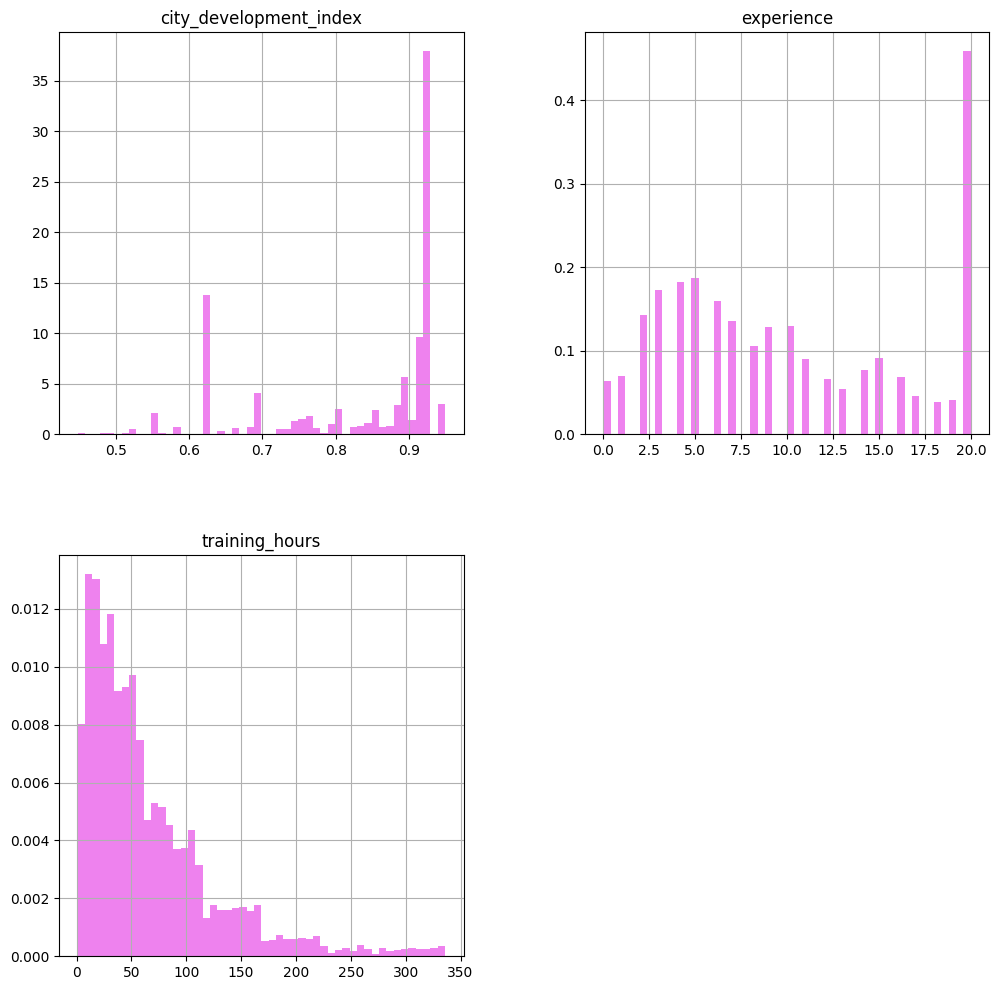

In [18]:
new_data.hist(bins=50, density=True, figsize=(12, 12), color='violet')
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['training_hours'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

### **Comparing the distribution of before dataset and new dataset by overlaying their distribution(for training_hours col.)**

<Axes: >

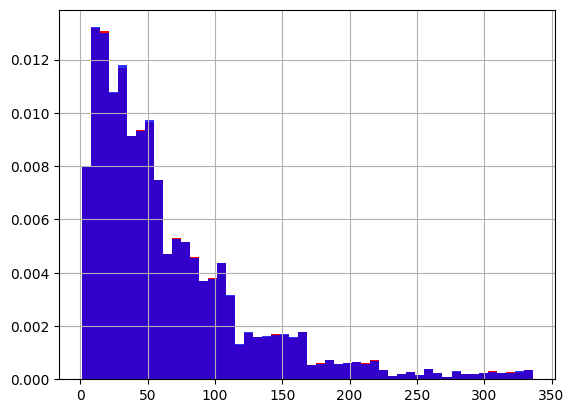

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
data['training_hours'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_data['training_hours'].hist(bins=50, ax=ax, color='blue', density=True, alpha=0.8)

### **Comparing the distribution of before dataset and new dataset by overlaying their distribution(for training_hours col. using density graph plot)**

<Axes: ylabel='Density'>

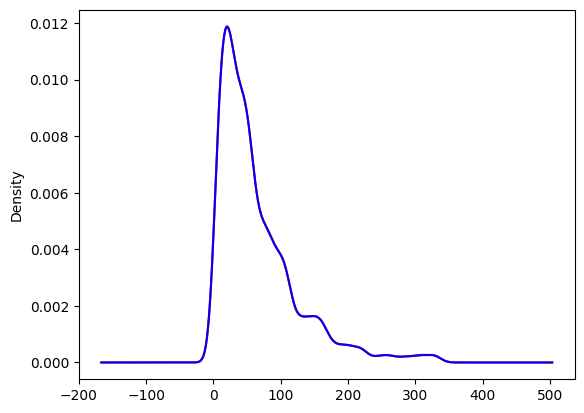

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
data['training_hours'].plot.density(color='red')

# data after cca
new_data['training_hours'].plot.density(color='blue')

### **Comparing the distribution of before dataset and new dataset by overlaying their distribution(for city_development_index col.)**

<Axes: >

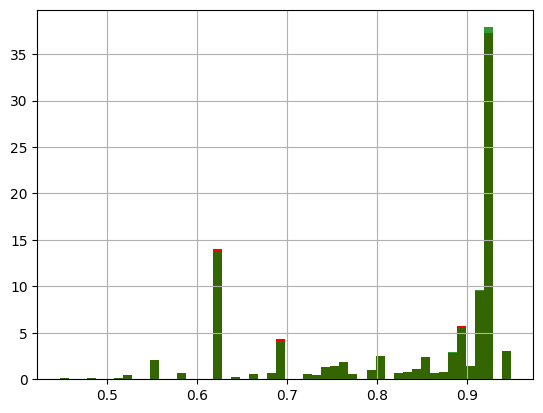

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
data['city_development_index'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_data['city_development_index'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

###  **Comparing the distribution of before dataset and new dataset by overlaying their distribution(for city_development_index col. using density graph plot)**

<Axes: ylabel='Density'>

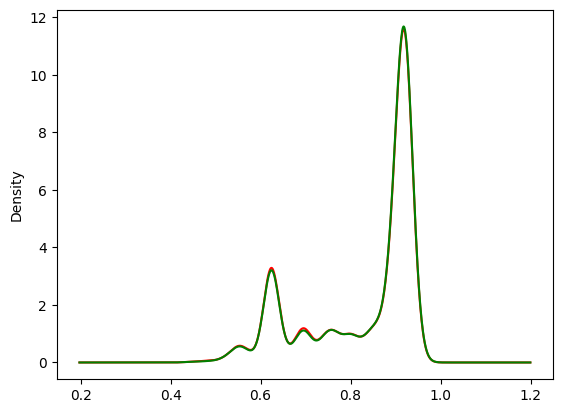

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
data['city_development_index'].plot.density(color='red')

# data after cca
new_data['city_development_index'].plot.density(color='green')

### **Comparing the distribution of before dataset and new dataset by overlaying their distribution(for experience col.)**

<Axes: >

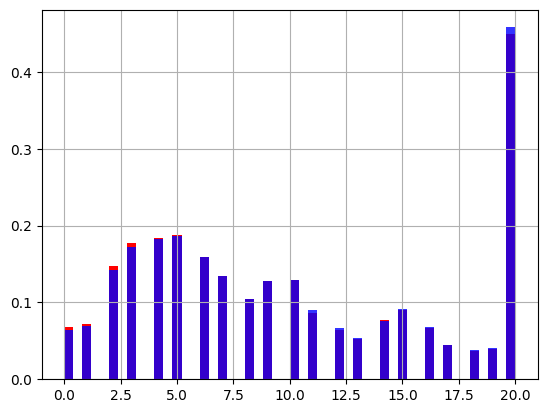

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
data['experience'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_data['experience'].hist(bins=50, ax=ax, color='blue', density=True, alpha=0.8)

### **Comparing the distribution of before dataset and new dataset by overlaying their distribution(for experience col. using density graph plot)**

<Axes: ylabel='Density'>

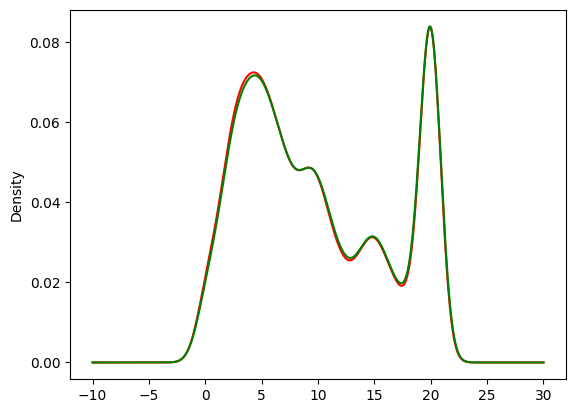

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
data['experience'].plot.density(color='red')

# data after cca
new_data['experience'].plot.density(color='green')

In [27]:
temp = pd.concat([
            # percentage of observations per category, original data
            data['enrolled_university'].value_counts() / len(data),

            # percentage of observations per category, cca data
            new_data['enrolled_university'].value_counts() / len(new_data)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [28]:
temp = pd.concat([
            # percentage of observations per category, original data
            data['education_level'].value_counts() / len(data),

            # percentage of observations per category, cca data
            new_data['education_level'].value_counts() / len(new_data)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587
